
**Title: Navigating the Pre-COVID Market: Developing Machine Learning Models for Predicting Toyota Car Prices**

Issue: In the pre-COVID era, the automotive market posed fewer challenges for both buyers and sellers, especially when it came to assessing the market value of used Toyota cars. Transactions were relatively straightforward back then. However, in today's rapidly evolving market, this once-simple task has become increasingly complex due to a combination of factors such as frequent model updates, economic fluctuations, and ever-shifting consumer preferences. When the market eventually settles, understanding the prices before COVID happened is crucial.

What Has Been Done: Recognizing the growing importance of valuing pre-COVID Toyota cars, I embarked on a mission to develop and refine multiple machine learning models capable of predicting their market values with precision and have selected the best one. Leveraging advanced data analysis techniques and tapping into extensive historical car data, I have created a system capable of providing accurate valuations, allowing us to glimpse into the pre-COVID pricing landscape.

Impact: My approach to predicting pre-COVID Toyota car values using machine learning holds significant promise for both buyers and sellers. By offering precise valuations specifically designed for the pre-pandemic market context, I empower analysts and consumers alike to make well-informed predictions of Toyota cars in a stable market. Sellers and dealerships can also leverage these insights to optimize their pricing strategies, enhancing their competitiveness in a stable market. Ultimately, this project enhances market efficiency and transparency, leading to improved outcomes for both sellers and buyers in a stable automotive market.

Contact Information: Hammad Qazi, Phone: 780-655-0803, Email: hammadqazi75@gmail.com

In [1]:
#IMPORTING LIBRARIES AND SETTING NOTEBOOK OPTIONS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import RidgeCV
from sklearn.neural_network import MLPRegressor

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
# Preprocessing our data to make it suitable for analysis

cars_data = pd.read_csv('carDataset/cars_dataset.csv')

# Filter for Toyota cars
processed_data= cars_data[cars_data["Make"] == 'toyota']

# Convert categorical data to dummy variables (1's and 0's)
transmission = pd.get_dummies(processed_data['transmission'], drop_first=True, prefix='transmission')
fuel = pd.get_dummies(processed_data['fuelType'], drop_first=True, prefix='fuelType')
model_of_cars = pd.get_dummies(processed_data['model'], drop_first=True, prefix='model')

# Drop original columns and join with dummy variables
processed_data = processed_data.drop(columns=['model', 'Make', 'transmission', 'fuelType'])
processed_data = processed_data.join(transmission)
processed_data = processed_data.join(fuel)
processed_data = processed_data.join(model_of_cars)

toyota_cars = processed_data.rename(columns={'engineSize': 'engine_size', 'transmission_Manual': 'trans_manual', 'transmission_Other': 'trans_other', 'transmission_Semi-Auto': 'trans_semi',
                                            'fuelType_Hybrid': 'fuel_hybrid', 'fuelType_Other': 'fuel_other', 'fuelType_Petrol': 'fuel_petrol', 'model_ Avensis': 'model_avensis', 'model_ Aygo': 'model_aygo',
                                            'model_ C-HR': 'model_c-hr', 'model_ Camry': 'model_camry', 'model_ Corolla': 'model_corolla', 'model_ GT86': 'model_gt86', 'model_ Hilux': 'model_hilux', 
                                            'model_ IQ': 'model_iq', 'model_ Land Cruiser': 'model_land_cruiser', 'model_ PROACE VERSO': 'model_proace_verso', 'model_ Prius': 'model_prius', 
                                            'model_ RAV4': 'model_rav4', 'model_ Supra': 'model_supra', 'model_ Urban Cruiser':'model_urban_cruiser', 'model_ Verso': 'model_verso', 
                                            'model_ Verso-S': 'model_verso-s', 'model_ Yaris': 'model_yaris'})

In [3]:
# Just for assurance let's check if our data set has any missing/ duplicate values
print("--------------------ORIGINAL UNFILTERED DATASET--------------------")
print(f'The number of rows in the dataset are: {toyota_cars.shape[0]}')
print(f'The number of columns in the dataset are: {toyota_cars.shape[1]}')
print(f'The number of duplicate entries in the dataset are: {toyota_cars.duplicated().sum()}')
print(f'The number missing values in the dataset are: {sum(toyota_cars.isna().sum())}')
print("-------------------------------------------------------------------")

--------------------ORIGINAL UNFILTERED DATASET--------------------
The number of rows in the dataset are: 6738
The number of columns in the dataset are: 29
The number of duplicate entries in the dataset are: 39
The number missing values in the dataset are: 0
-------------------------------------------------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Turns out we have no missing values which is good but we do have a few duplicate entries. However this is fine as it just means we have some repeated data in our dataset
which makes sense as, cars in general are bound to be similar which could lead to duplicate entries.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [4]:
# Now that we have established our data set let's begin splitting it up in to training and testing data
rng = 10
model = toyota_cars.drop(columns='price')
prices = toyota_cars['price']

# 75% of our data is for training the model, the other 25% is for testing the model
model_train, model_test, prices_train, prices_test = train_test_split(model, prices, test_size=0.25, random_state = rng)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Now that we have properly split up our data, we can attempt to use different models to see which one yields the best results at the end. Then once we find the best model, we will build our program around it. 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

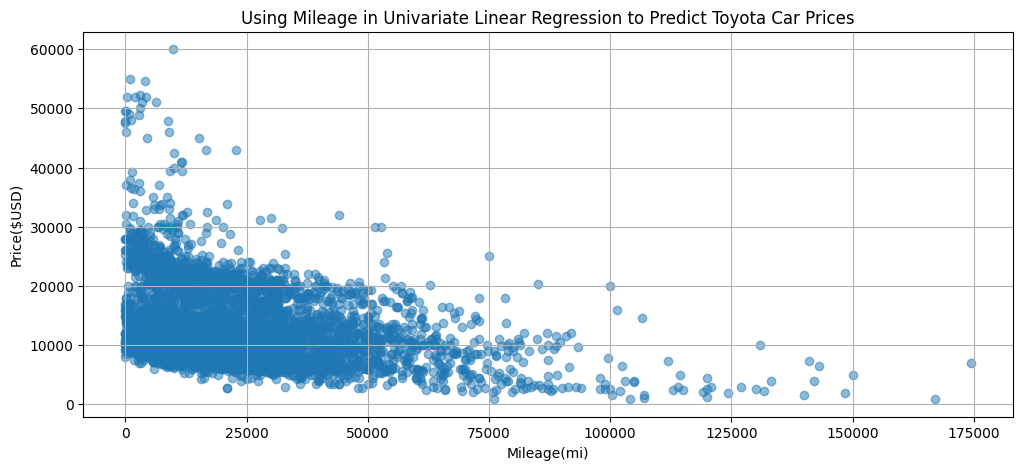

In [5]:
# This model is the univariate linear regression model which uses just one numeric variable (mileage) to predict the prices of cars
model_train_mileage = model_train['mileage']
model_test_mileage = model_test['mileage']

# Create a scatter plot to demonstrate relationship
plt.figure(figsize=(12, 5))  
plt.scatter(model_train_mileage, prices_train, alpha=0.5)
plt.title('Using Mileage in Univariate Linear Regression to Predict Toyota Car Prices')
plt.xlabel('Mileage(mi)')
plt.ylabel('Price($USD)')
plt.grid(True)

plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
This graph at first glance is likely either cubic or, reciprocally logarithmic in shape. We will try cubic and logarithmic models of this sort later, however, let's attempt a simple linear model to determine it's successs.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [6]:
# Building our hypothesis function for our univariate linear machine learning model

# Preparing the linear features to be added to our own model
reg = linear_model.LinearRegression()
reg.fit(model_train_mileage.to_frame(), prices_train)
print("-------------------------------------------------------------------")
print(f'The y-intercept of our univariate linear graph would be: {reg.intercept_}')
print(f'The slope of our univariate linear graph would be: {reg.coef_}')
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
The y-intercept of our univariate linear graph would be: 14806.232089501067
The slope of our univariate linear graph would be: [-0.09910957]
-------------------------------------------------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
This means our hypothesis function is approxiamately: Price = 14806.2 + (-0.01 * Mileage). This function gives us a prediction for the price of any toyota car given its mileage.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

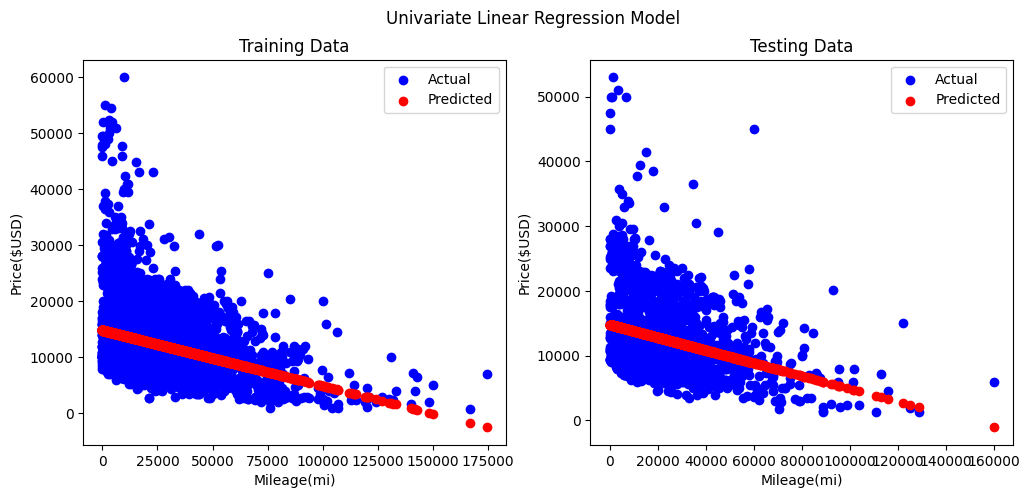

In [7]:
# Creating a graph to demonstrate the effectiveness of the univariate linear machine learning model

train_predictions_linear = reg.predict(model_train_mileage.to_frame())
test_predictions_linear = reg.predict(model_test_mileage.to_frame())

# Making easy to understand variables from our previous train and testing values
linear_train = model_train_mileage.values
linear_test = model_test_mileage.values
linear_train_actual = prices_train.values
linear_test_actual = prices_test.values

# Calculate predicted values for all toyota cars
train_predictions_linear = reg.predict(linear_train.reshape(-1, 1))
test_predictions_linear = reg.predict(linear_test.reshape(-1, 1))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Univariate Linear Regression Model')

# Plot training data
ax1.scatter(linear_train, linear_train_actual, color='blue', label='Actual')
ax1.scatter(linear_train, train_predictions_linear, color='red', label='Predicted')
ax1.set_title('Training Data')
ax1.set_xlabel('Mileage(mi)')
ax1.set_ylabel('Price($USD)')
ax1.legend()

# Plot test data
ax2.scatter(linear_test, linear_test_actual, color='blue', label='Actual')
ax2.scatter(linear_test, test_predictions_linear, color='red', label='Predicted')
ax2.set_title('Testing Data')
ax2.set_xlabel('Mileage(mi)')
ax2.set_ylabel('Price($USD)')
ax2.legend()

plt.show()


In [8]:
# Calculate and display the accuracy of our linear model

linear_test_score = (reg.score(linear_test.reshape(-1, 1), prices_test) * 100)
linear_train_score = (reg.score(linear_train.reshape(-1, 1), prices_train) * 100)

formatted_linear_training_score = f"{linear_train_score:.2f}%"
formatted_linear_testing_score = f"{linear_test_score:.2f}%"

print("-------------------------------------------------------------------")
print(f'Training score: {formatted_linear_training_score}%')
print(f'Testing score: {formatted_linear_testing_score}%')
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Training score: 8.96%%
Testing score: 8.62%%
-------------------------------------------------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
These graphs training and test scores show poor results proving that our univariate linear model attempting to predict toyota car is inaccurate. Let's attempt some different models univariate modles and see if we can improve.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [9]:
# Seeing that the linear model was unsuccessful let's try the cubic model 

# Preparing the cubic features to be added to our own model
cubic = PolynomialFeatures(degree=3, include_bias=False)
model_train_mileage_cubic = cubic.fit_transform(model_train_mileage.to_frame())
model_test_mileage_cubic = cubic.fit_transform(model_test_mileage.to_frame())

# Putting the model through linear regression to fit the model and get predictions for the training and testing set's
cubic_model = linear_model.LinearRegression()
cubic_model.fit(model_train_mileage_cubic, prices_train)

print(f'The y-intercept of our univariate linear graph would be: {cubic_model.intercept_}')
print(f'The slope of our univariate linear graph would be: {cubic_model.coef_}')

The y-intercept of our univariate linear graph would be: 16002.748210181064
The slope of our univariate linear graph would be: [-2.26079737e-01  2.56732019e-06 -1.13548875e-11]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The reason why our cubic model slope looks different the from the linear model slope is because it holds three different features. Thus, one of the numbers in our output is raised to the power of three, another to the power of two and another to the power of one. Therefore, it's more specialized than the linear model because the slope is more complex with multiple different features.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

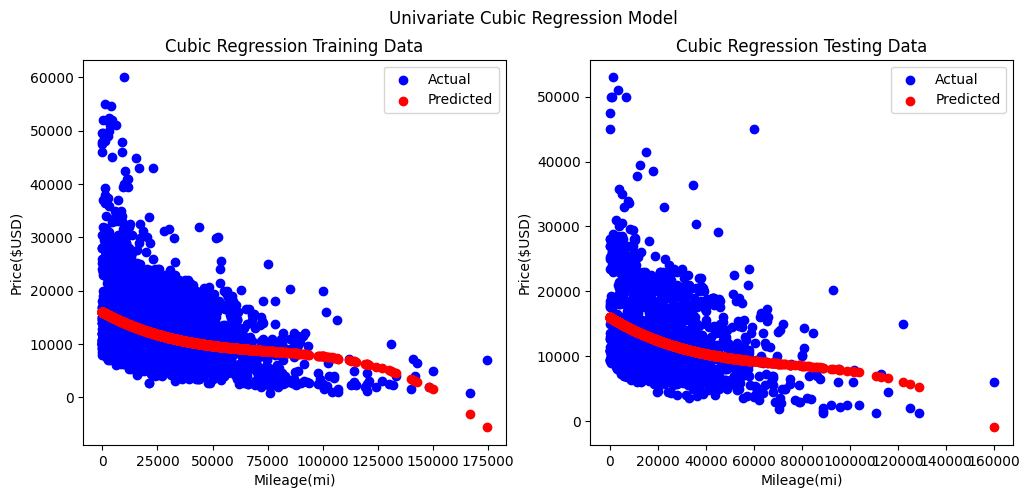

In [10]:
# Creating a graph to display our univariate cubic model

# Calculate predicted values for all toyota cars
train_predictions_cubic = cubic_model.predict(model_train_mileage_cubic)
test_predictions_cubic = cubic_model.predict(model_test_mileage_cubic)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Univariate Cubic Regression Model')

# Sort the data for smoother plots
sorted_train_idx = np.argsort(model_train_mileage)
sorted_test_idx = np.argsort(model_test_mileage)

# Plot training data
ax1.scatter(model_train_mileage.iloc[sorted_train_idx], prices_train.iloc[sorted_train_idx], color='blue', label='Actual')
ax1.scatter(model_train_mileage.iloc[sorted_train_idx], train_predictions_cubic[sorted_train_idx], color='red', label='Predicted')
ax1.set_title('Cubic Regression Training Data')
ax1.set_xlabel('Mileage(mi)')
ax1.set_ylabel('Price($USD)')
ax1.legend()

# Plot test data
ax2.scatter(model_test_mileage.iloc[sorted_test_idx], prices_test.iloc[sorted_test_idx], color='blue', label='Actual')
ax2.scatter(model_test_mileage.iloc[sorted_test_idx], test_predictions_cubic[sorted_test_idx], color='red', label='Predicted')
ax2.set_title('Cubic Regression Testing Data')
ax2.set_xlabel('Mileage(mi)')
ax2.set_ylabel('Price($USD)')
ax2.legend()

plt.show()


In [11]:
# Displaying our cubic model's results

cubic_train_score = ((cubic_model.score(model_train_mileage_cubic,prices_train)) * 100)
cubic_test_score = ((cubic_model.score(model_test_mileage_cubic,prices_test)) * 100)

formatted_cubic_train_score = f"{cubic_train_score:.2f}%"
formatted_cubic_test_score = f"{cubic_test_score:.2f}%"

print("-------------------------------------------------------------------")
print(f'Training score: {formatted_cubic_train_score}%')
print(f'Testing score: {formatted_cubic_test_score}%')
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Training score: 9.91%%
Testing score: 9.74%%
-------------------------------------------------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Looks like the cubic model is a bit bitter than the linear model however, the results are still very poor; let's try a logarithmic model.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [12]:
# Attempting the reciprocally logarithmic model

# Making reciprocally logarithmic model
def addReciprocalLogFeatures(numeric):
    # Copy the input numeric array.
    log_feats = numeric.copy()

    # Identify valid elements for logarithmic transformation.
    valid = (log_feats != 1) & (log_feats > 0)

    # Apply base-10 logarithm to valid elements.
    log_feats[valid] = np.log(log_feats[valid]) / np.log(10)

    # Replace non-positive elements with a small positive value.
    log_feats[log_feats <= 0] = 1e-10

    # Compute the reciprocal of log-transformed elements.
    rec_log_feats = 1 / log_feats
    
    # Combine original, reciprocal, and product features.
    return np.hstack([numeric, rec_log_feats, numeric * rec_log_feats])

# training our model with the new reciprocal log features
model_train_mileage_rl = addReciprocalLogFeatures(model_train_mileage.to_frame())
model_test_mileage_rl = addReciprocalLogFeatures(model_test_mileage.to_frame())

print("-------------------------------------------------------------------")
print('model_train_mileage_rl =\n' + str(model_train_mileage_rl[:4,:]))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
model_train_mileage_rl =
[[3.12340000e+04 2.22487843e-01 6.94918528e+03]
 [2.75030000e+04 2.25256676e-01 6.19523437e+03]
 [1.87890000e+04 2.33978133e-01 4.39621514e+03]
 [1.95730000e+04 2.33010212e-01 4.56070888e+03]]
-------------------------------------------------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
These numbers represent the first four rows in the training array for the logarithmic model. The first column represents the original values for the mileage. The second column represents the reciprocal of the logarithmically transformed mileage values. The third column represents the product of the original mileage values and the reciprocal of the logarithmically transformed mileage values. Each row displays some information for a specific data point within the graph. Essentially this means that the reciprocally logarithmic model is changing every point to the match the points on the graph.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

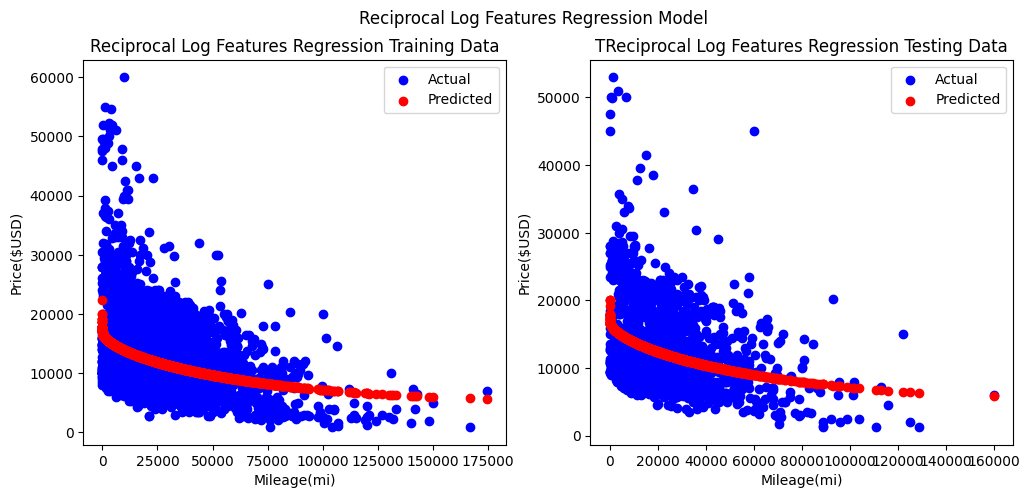

In [13]:
# Creating a graph to display the reciprocally logarithmic model

# Linear regression used to fit the model
rl_model = linear_model.LinearRegression()
rl_model.fit(model_train_mileage_rl, prices_train)

train_predictions_rl = rl_model.predict(model_train_mileage_rl)
test_predictions_rl = rl_model.predict(model_test_mileage_rl)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Reciprocal Log Features Regression Model')

# Sort the data for smoother plots
sorted_train_idx = np.argsort(model_train_mileage)
sorted_test_idx = np.argsort(model_test_mileage)

# Plot training data
ax1.scatter(model_train_mileage.iloc[sorted_train_idx], prices_train.iloc[sorted_train_idx], color='blue', label='Actual')
ax1.scatter(model_train_mileage.iloc[sorted_train_idx], train_predictions_rl[sorted_train_idx], color='red', label='Predicted')
ax1.set_title('Reciprocal Log Features Regression Training Data')
ax1.set_xlabel('Mileage(mi)')
ax1.set_ylabel('Price($USD)')
ax1.legend()

# Plot test data
ax2.scatter(model_test_mileage.iloc[sorted_test_idx], prices_test.iloc[sorted_test_idx], color='blue', label='Actual')
ax2.scatter(model_test_mileage.iloc[sorted_test_idx], test_predictions_rl[sorted_test_idx], color='red', label='Predicted')
ax2.set_title('TReciprocal Log Features Regression Testing Data')
ax2.set_xlabel('Mileage(mi)')
ax2.set_ylabel('Price($USD)')
ax2.legend()

plt.show()

In [14]:
# Displaying our reciprocally logarithmic model's results

rl_train_score = ((rl_model.score(model_train_mileage_rl, prices_train)) * 100)
rl_test_score = ((rl_model.score(model_test_mileage_rl, prices_test)) * 100)

formatted_rl_train_score = f"{rl_train_score:.2f}%"
formatted_rl_test_score = f"{rl_test_score:.2f}%"

print("-------------------------------------------------------------------")
print(f'Training score: {formatted_rl_train_score}%')
print(f'Test score: {formatted_rl_test_score}%')
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Training score: 10.20%%
Test score: 9.89%%
-------------------------------------------------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
From the results of the log function we can also see that the results were poor. So far all of our methods have been inadequate however, this is likely because we were only using mileage as the deciding factor when it comes to car prices. Let's try building model's that take more factors in to consideration other than mileage. However, since our numbers can vary in range by a lot we also have to scale our data which is a technique that makes data points generalized so they'll be closer together in scale. 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

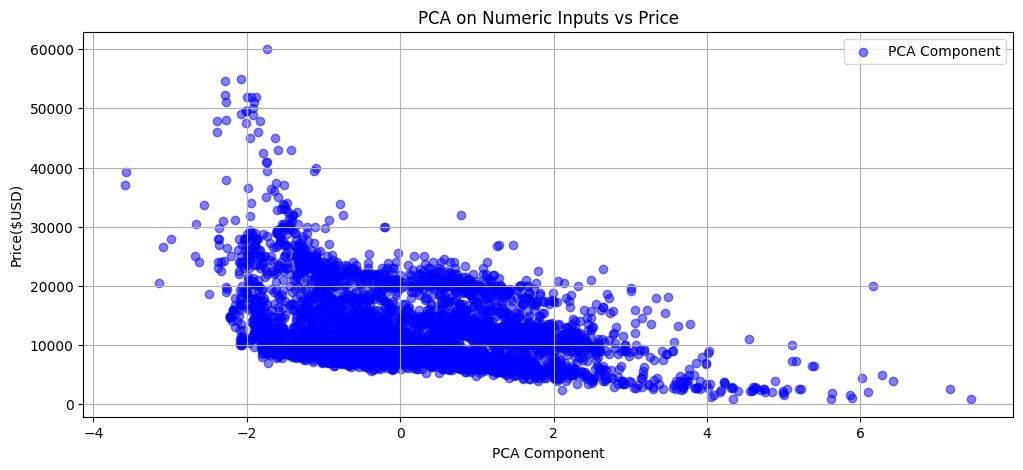

In [15]:
# We want to scale our data so we can acheive better results

num_cols = ['year', 'mileage', 'tax', 'mpg', 'engine_size']

# Training our model with the numeric columns
model_train_numeric = model_train[num_cols]
model_test_numeric = model_test[num_cols]

# Scaling our data
scaler = StandardScaler()
model_train_numeric_scaled = scaler.fit_transform(model_train_numeric)
model_test_numeric_scaled = scaler.fit_transform(model_test_numeric)

# Reducing the dimensions of our dataset
pca = PCA(n_components=1)
train_pca = pca.fit_transform(model_train_numeric_scaled)

plt.figure(figsize=(12, 5))
plt.scatter(train_pca, prices_train, alpha=0.5, c='b', label='PCA Component')
plt.xlabel('PCA Component')
plt.ylabel('Price($USD)')
plt.title('PCA on Numeric Inputs vs Price')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
If we compare this graph with the first univariate regression graph with mileage as it's only numeric input, we can observe some changes. This new graph is more unified and less rigid with less outliers beacuse our data is scaled. Now looking at the shape of this new scaled graph with all our numeric columns in consideration, let's try our cubic and logarithmic models again.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [16]:
# Applying the scaled data to our cubic model to see how well it does

num_cols = ['year', 'mileage', 'tax', 'mpg', 'engine_size']

# Select numeric columns
model_train_numeric = model_train[num_cols]
model_test_numeric = model_test[num_cols]

# Standardize numeric data
scaler = StandardScaler()
model_train_numeric_scaled = scaler.fit_transform(model_train_numeric)
model_test_numeric_scaled = scaler.fit_transform(model_test_numeric)

# Apply cubic transformation to numeric columns
cubic = PolynomialFeatures(degree=3)
model_train_numeric_cubic = cubic.fit_transform(model_train_numeric_scaled)
model_test_numeric_cubic = cubic.fit_transform(model_test_numeric_scaled)

# Encode nominal columns using one-hot encoding so we can use it with our scaled data
nominal_cols = ['trans_manual', 'trans_other', 'trans_semi', 'fuel_hybrid', 'fuel_other', 'fuel_petrol',
                'model_avensis', 'model_aygo', 'model_c-hr', 'model_camry', 'model_corolla', 'model_gt86',
                'model_hilux', 'model_iq', 'model_proace_verso', 'model_prius', 'model_land_cruiser',
                'model_rav4', 'model_supra', 'model_verso', 'model_verso-s', 'model_yaris']

model_train_nominal = model_train[nominal_cols]
model_test_nominal = model_test[nominal_cols]

encoder = OneHotEncoder()
model_train_nominal_encoded = encoder.fit_transform(model_train_nominal)
model_test_nominal_encoded = encoder.transform(model_test_nominal)

# Combine numeric and nominal columns
model_train_cubic_full = np.hstack([model_train_numeric_cubic, model_train_nominal_encoded.toarray()])
model_test_cubic_full = np.hstack([model_test_numeric_cubic, model_test_nominal_encoded.toarray()])

# Ridge CV helps predict test data and check accuracy
cubic_model = RidgeCV()
cubic_model.fit(model_train_cubic_full, prices_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [17]:
# Now that we have a scaled cubic model let's test out it's accuracy

cubic_scaled_train_score = ((cubic_model.score(model_train_cubic_full, prices_train)) * 100)
cubic_scaled_test_score = ((cubic_model.score(model_test_cubic_full, prices_test)) * 100)

formatted_cubic_scaled_train_score = f"{cubic_scaled_train_score:.2f}%"
formatted_cubic_scaled_test_score = f"{cubic_scaled_test_score:.2f}%"

print("-------------------------------------------------------------------")
print(f'Training score: {formatted_cubic_scaled_train_score}%')
print(f'Test score: {formatted_cubic_scaled_test_score}%')
print("-------------------------------------------------------------------")

test_predictions_cubic = cubic_model.predict(model_test_cubic_full)

# Create a DataFrame to store the predicted and actual values
cubic_df = pd.DataFrame({"Predicted": test_predictions_cubic, "Actual": prices_test})

# Calculate the percentage difference between predicted and actual values
cubic_df['% Difference'] = (abs(cubic_df['Predicted'] - cubic_df['Actual']) / cubic_df['Actual']) * 100

print("Percentage Difference between Predicted and Actual Values (Cubic Model)")
print(cubic_df.head())
print("\nMean % Difference between Predicted and Actual Values: {:.2f}%".format(cubic_df['% Difference'].mean()))

-------------------------------------------------------------------
Training score: 96.40%%
Test score: 95.39%%
-------------------------------------------------------------------
Percentage Difference between Predicted and Actual Values (Cubic Model)
          Predicted  Actual  % Difference
60579  23030.834823   22450      2.587238
58491   5868.929060    5150     13.959788
57125   7907.360892    7000     12.962298
55147  30057.978929   29550      1.719049
58462   9616.913322   10000      3.830867

Mean % Difference between Predicted and Actual Values: 8.20%


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Definitely a very big improvement to our cubic model now that we have scaled the data. Let's see how the logarithmic one does when scaled and compare!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [18]:
# Applying the scaled data to our reciprocally logarithmic model to see how well it does

# Select numeric columns
model_train_numeric = model_train[num_cols]
model_test_numeric = model_test[num_cols]

# Scale numeric data
scaler = StandardScaler()
model_train_numeric_scaled = scaler.fit_transform(model_train_numeric)
model_test_numeric_scaled = scaler.transform(model_test_numeric)

# Train our logartihmic models with the numeric data
model_train_rl = addReciprocalLogFeatures(model_train_numeric)
model_test_rl = addReciprocalLogFeatures(model_test_numeric)

# Encode nominal columns using one-hot encoding
model_train_nominal = model_train[nominal_cols]
model_test_nominal = model_test[nominal_cols]

encoder = OneHotEncoder()
model_train_nominal_encoded = encoder.fit_transform(model_train_nominal)
model_test_nominal_encoded = encoder.transform(model_test_nominal)

# Combine numeric and nominal columns
model_train_rl_scaled = scaler.fit_transform(model_train_rl)
model_test_rl_scaled = scaler.transform(model_test_rl)

model_train_rl_full = np.hstack([model_train_rl_scaled, model_train_nominal_encoded.toarray()])
model_test_rl_full = np.hstack([model_test_rl_scaled, model_test_nominal_encoded.toarray()])

# Ridge CV helps predict test data and check accuracy
rl_model = RidgeCV()
rl_model.fit(model_train_rl_full, prices_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [19]:
# Now that we have a scaled cubic model let's test out it's accuracy

rl_scaled_train_score = ((rl_model.score(model_train_rl_full, prices_train)) * 100)
rl_scaled_test_score = ((rl_model.score(model_test_rl_full, prices_test)) * 100)

formatted_rl_scaled_train_score = f"{rl_scaled_train_score:.2f}%"
formatted_rl_scaled_test_score = f"{rl_scaled_test_score:.2f}%"

print("-------------------------------------------------------------------")
print(f'Training score: {formatted_rl_scaled_train_score}%')
print(f'Test score: {formatted_rl_scaled_test_score}%')
print("-------------------------------------------------------------------")

# Create a DataFrame to store the predicted and actual values
rl_df = pd.DataFrame({"Predicted": test_predictions_rl, "Actual": prices_test})

# Calculate the percentage difference between predicted and actual values
rl_df['% Difference'] = (abs(rl_df['Predicted'] - rl_df['Actual']) / rl_df['Actual']) * 100

print("Percentage Difference between Predicted and Actual Values (Reciprocal Log Model)")
print(rl_df.head())
print("\nMean % Difference between Predicted and Actual Values: {:.2f}%".format(rl_df['% Difference'].mean()))

-------------------------------------------------------------------
Training score: 93.91%%
Test score: 93.28%%
-------------------------------------------------------------------
Percentage Difference between Predicted and Actual Values (Reciprocal Log Model)
          Predicted  Actual  % Difference
60579  13440.810199   22450     40.130021
58491  10037.406863    5150     94.901104
57125  14392.972213    7000    105.613889
55147  14158.075319   29550     52.087732
58462  16191.078265   10000     61.910783

Mean % Difference between Predicted and Actual Values: 42.63%


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
So it looks like our scaled cubic model has yielded the best results thus far. However, we have one more special model to try which utilizes neural networks to predict car prices.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [20]:
# Let's create a neural network to predict our car prices

# Creating a preprocessor for each data point to go through
preprocessor = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include=object)),
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
)

# Configuring our neural network to obtain the best results
neural_net = MLPRegressor(
    hidden_layer_sizes=(10,),
    max_iter=150,
    learning_rate_init=0.3,
    random_state=rng
    )

# Making a pipeline which first preprocesses the data then passes it to the neural network
car_price_model = make_pipeline(preprocessor, neural_net)

In [21]:
# Train the model with our data
car_price_model.fit(model_train, prices_train)

# Make predictions
train_predictions = car_price_model.predict(model_train)
test_predictions = car_price_model.predict(model_test)

# Create a DataFrame to store the predicted and actual values for the test set
car_price_df = pd.DataFrame({"Predicted": test_predictions, "Actual": prices_test})

# Calculate the percentage difference between predicted and actual values
car_price_df['% Difference'] = (abs(car_price_df['Predicted'] - car_price_df['Actual']) / car_price_df['Actual']) * 100

# Calculate training and test scores
neural_scaled_train_score = ((car_price_model.score(model_train, prices_train)) * 100)
neural_scaled_test_score = ((car_price_model.score(model_test, prices_test)) * 100)

formatted_neural_scaled_train_score = f"{neural_scaled_train_score:.2f}%"
formatted_neural_scaled_test_score = f"{neural_scaled_test_score:.2f}%"

print("-------------------------------------------------------------------")
print(f'Training score: {formatted_neural_scaled_train_score}')
print(f'Test score: {formatted_neural_scaled_test_score}')
print("-------------------------------------------------------------------")

# Display the DataFrame with predicted and actual values and percentage difference
print("Percentage Difference between Predicted and Actual Values")
print(car_price_df.head())
print("\nMean % Difference between Predicted and Actual Values: {:.2f}%".format(car_price_df['% Difference'].mean()))

-------------------------------------------------------------------
Training score: 96.37%
Test score: 96.08%
-------------------------------------------------------------------
Percentage Difference between Predicted and Actual Values
          Predicted  Actual  % Difference
60579  24147.315629   22450      7.560426
58491   5631.517783    5150      9.349860
57125   8134.465350    7000     16.206648
55147  30127.359158   29550      1.953838
58462   9878.893586   10000      1.211064

Mean % Difference between Predicted and Actual Values: 7.29%


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
As it turns out, our newly created neural network has the cubic model slightly beat by about a one percent difference. Now that we possess this neural network, currently our best tool in our arsenal, we will be proceeding with model to estimate our car prices. Before that though, let's take a deeper dive in to our neural network to see if we can identify any interesting trends. 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

In [22]:
# Check the number of iterations within our neural network so we can improve efficiency based off of that

num_iterations = car_price_model.named_steps.mlpregressor.n_iter_
print("-------------------------------------------------------------------")
print(f'The number of iterations within our neural network was: {num_iterations}')
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
The number of iterations within our neural network was: 132
-------------------------------------------------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
By setting the max number of iterations in our neural network to 150 based off this number of iterations, we can greatly increase the efficiency of our neural network by reducing run times.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

<AxesSubplot:>

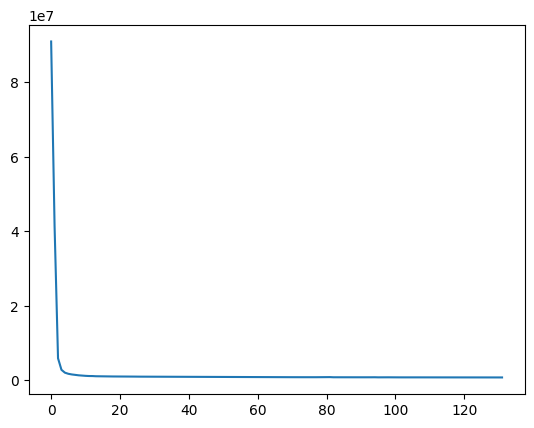

In [23]:
# Determining our loss curve (a graph that tells us what the error of our model is at each iteration)

loss_curve = car_price_model.named_steps.mlpregressor.loss_curve_
# The length of items in the loss curve is the same as the number of iterations

# Quick sketch of our loss curve
pd.Series(loss_curve).plot.line()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
This graph shows us that our error levels started our very high and dropped quickly only after a few iterations. Given the initial high error followed by a rapid decrease, it could be inferred that the model might not be making significant progress for 100 iterations. This is not true though, as this perception is caused by the y-axis. Let's check the last 50 iterations to make sure our model is still making improvements.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

<AxesSubplot:>

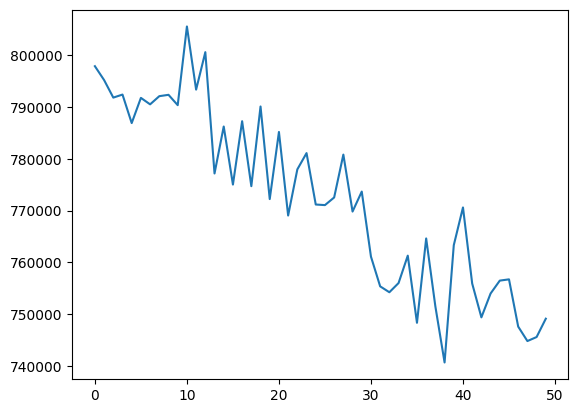

In [24]:
# Checking to see if our model is still improving even at it's last 50 iterations

pd.Series(loss_curve[-50:]).plot.line()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
From this we can see until the end of training that the model was still making improvements as the error was decreasing. However, you'll notice that even though we aren't even close to zero we still stop the model at our max number of iterations. This is because the model decides to stop when the model's error doesn't go down more than a certain number for 10 consecutive iterations it decides to stop. If this measure wasn't in place then the number of iterations would likely be infinite as the model would continue to make negligible improvements.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
NOTE!: Even though the y-axis of the graph above contains large numbers please keep in mind we are still very close to zero at this point proven from the graph above this one. 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

<AxesSubplot:>

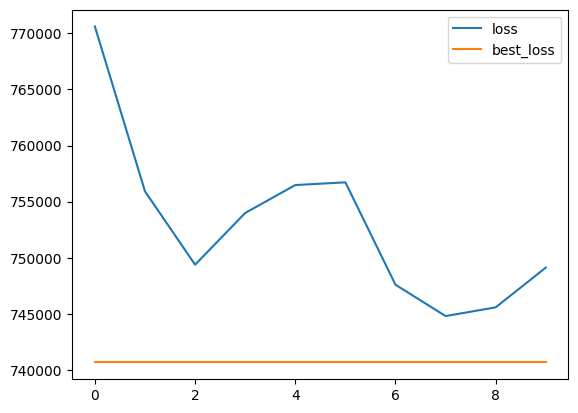

In [25]:
# Creating a graph to that our improvements were minimal in the last 10 iterations
pd.DataFrame({'loss': loss_curve[-10:], 'best_loss': car_price_model[-1].best_loss_}).plot.line()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
You can notice that in the final 10 iterations not a single one improved reducing their error rate past the point of the orange line thus, it's gives the model justification to stop as further improvement would be trivial.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [26]:
# Let's create a way for a user to figure out their toyota car price based on it's attributes!

# Define a list of all possible car models (modify this as needed)
all_car_models = [
    'avensis', 'aygo', 'c-hr', 'camry', 'corolla', 'gt86',
    'hilux', 'iq', 'land_cruiser', 'proace_verso', 'prius',
    'rav4', 'supra', 'urban_cruiser', 'verso', 'verso-s', 'yaris'
]

# Make a function that gets user input
def get_user_input():
    print("Please provide the following information about your car:")
    print("Type 'quit' at any time to exit.")
    
    model = input("Model (e.g., avensis, aygo, c-hr, etc.): ").strip().lower()
    
    # Check for a quit command
    if model == 'quit':
        return None
    
    while model not in all_car_models:
        print("Invalid model. Please choose from the list of available models.")
        model = input("Model (e.g., avensis, aygo, c-hr, etc.): ").strip().lower()
        if model == 'quit':
            return None
    
    year = input("Year (e.g., 2016): ").strip()
    if year == 'quit':
        return None
    
    mileage = input("Mileage (e.g., 24089): ").strip()
    if mileage == 'quit':
        return None
    
    tax = input("Tax (e.g., 265.0): ").strip()
    if tax == 'quit':
        return None
    
    mpg = input("Miles per gallon (e.g., 36.2): ").strip()
    if mpg == 'quit':
        return None
    
    engine_size = input("Engine size (e.g., 2.0): ").strip()
    if engine_size == 'quit':
        return None
    
    transmission = input("Transmission type (manual, automatic, semi, or other): ").strip()
    if transmission == 'quit':
        return None
    if transmission not in ['manual', 'automatic', 'semi', 'other']:
        transmission = "I don't know"

    fuel_type = input("Fuel type (e.g., hybrid, other, petrol): ").strip()
    if fuel_type == 'quit':
        return None
    if fuel_type not in ['hybrid', 'other', 'petrol']:
        fuel_type = "I don't know"

    return model, year, mileage, tax, mpg, engine_size, transmission, fuel_type

# Process the user's input
def preprocess_input(user_input):
    model = user_input[0]
    year = user_input[1]
    mileage = user_input[2]
    tax = user_input[3]
    mpg = user_input[4]
    engine_size = user_input[5]
    transmission = user_input[6]
    fuel_type = user_input[7]

    # Create a dictionary from user input
    user_data = {
        'model': [model],
        'year': [year],
        'mileage': [mileage],
        'tax': [tax],
        'mpg': [mpg],
        'engine_size': [engine_size],
        'trans_manual': [1 if transmission == 'manual' else 0],
        'trans_other': [1 if transmission == 'other' else 0],
        'trans_semi': [1 if transmission == 'semi' else 0],
        'fuel_hybrid': [1 if fuel_type == 'hybrid' else 0],
        'fuel_other': [1 if fuel_type == 'other' else 0],
        'fuel_petrol': [1 if fuel_type == 'petrol' else 0],
    }

    # Create one-hot encoded columns for the car model
    for car_model in all_car_models:
        user_data[f'model_{car_model}'] = [1 if model == car_model else 0]

    # Create a DataFrame from the dictionary
    user_df = pd.DataFrame(user_data)
    return user_df

# Predict prices with the users input
def predict_price(user_df):
    try:
        # Predict the price using the trained model
        predicted_price = car_price_model.predict(user_df)[0]
        return predicted_price
    except Exception as e:
        print("Error predicting the price:", str(e))
        return None

if __name__ == "__main__":
    while True:
        user_input = get_user_input()
        
        # Check if user wants to quit
        if user_input is None:
            print("Goodbye!")
            break
        
        user_df = preprocess_input(user_input)
        predicted_price = predict_price(user_df)
        
        # Getting a range of prices instead of a singular one 
        low_end = predicted_price * 0.9
        high_end = predicted_price * 1.1
        formatted_low_price = f"{low_end:.2f}"
        formatted_high_price = f"{high_end:.2f}"
    
        if predicted_price is not None:
            print(f"The predicted price range for your car is: ${formatted_low_price} - ${formatted_high_price}")
        else:
            print("Unable to predict the price.")

Please provide the following information about your car:
Type 'quit' at any time to exit.
The predicted price range for your car is: $3764.36 - $4600.89
Please provide the following information about your car:
Type 'quit' at any time to exit.
Goodbye!


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In the scenario above I gave the model some information in order to predict the price of a specific car. Here is what I fed the model:
Model: urban_cruiser
Year: 2011
Mileage: 45128
Tax: 125.0
Miles Per Gallon: 50.4
Engine Size: 1.3
Transmission Type: manual
Fuel Type: petrol
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
NOTE!: Please keep in mind if you are going to use the car price predictor it has only trained on the toyota models: Avensis, Aygo, C-HR, Camry, Corolla, GT86, Hilux, IQ, Land Cruiser, Proace Verso, Prius, Rav4, Supra, Urban Cruiser, Verso, Verso-S and Yaris. Additionally this model is only made to predict based on what it has been given. For instance, if a car is older the model will naturally reduce it's valuation. As such this model does not take in to account legacy cars that some value more due to their scarcity in the market. 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~